## 머신러닝 실습

### 와인품질 등급 회귀분석

#### 데이터 수집

##### UC 어바인 머신러닝 연구소 모듈 사용

In [1]:
## 필수 라이브러리 사용등록
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo

In [2]:
## 와인 데이터 가져오기, 와인품질 id=186
wineQuality = fetch_ucirepo(id=186)

In [3]:
dfWineQuality = wineQuality.data.original

In [4]:
dfWineQuality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
dfWineQuality.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


##### 머신러닝 준비
- X, y 값 생성

In [6]:
X = dfWineQuality.drop(['quality', 'color'], axis=1)

In [7]:
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [8]:
y = dfWineQuality['quality']

#### 분석모델 구축, 결과 분석

In [9]:
## 회귀분석용 모델, 함수 사용등록
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import sklearn

In [10]:
# 훈련용 데이터와 검증(평가)용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=156)

In [11]:
X_test

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
5001,7.7,0.46,0.18,3.3,0.054,18.0,143.0,0.99392,3.12,0.51,10.8
2943,7.3,0.23,0.37,1.9,0.041,51.0,165.0,0.99080,3.26,0.40,12.2
6341,6.0,0.27,0.32,3.6,0.035,36.0,133.0,0.99215,3.23,0.46,10.8
4385,8.0,0.30,0.36,11.0,0.034,8.0,70.0,0.99354,3.05,0.41,12.2
2519,7.0,0.11,0.32,4.6,0.057,59.0,144.0,0.99560,3.55,0.44,9.4
...,...,...,...,...,...,...,...,...,...,...,...
2737,9.2,0.28,0.46,3.2,0.058,39.0,133.0,0.99600,3.14,0.58,9.5
3190,6.4,0.12,0.49,6.4,0.042,49.0,161.0,0.99450,3.34,0.44,10.4
1836,6.8,0.52,0.32,13.2,0.044,54.0,221.0,0.99720,3.27,0.50,9.6
5958,7.2,0.34,0.20,5.8,0.062,52.0,203.0,0.99461,3.17,0.44,9.8


In [12]:
y_test

5001    6
2943    8
6341    6
4385    6
2519    7
       ..
2737    5
3190    6
1836    6
5958    6
3560    5
Name: quality, Length: 1950, dtype: int64

In [13]:
## 선형회귀 모델 생성
model = LinearRegression()

In [14]:
# 선형회귀 모델 훈련
model.fit(X_train, y_train) # X는 독립변수 12, y는 종속변수(품질)

LinearRegression()

In [15]:
# 선형회귀 분석, 예측
# X_test를 매개변수로 실행했을 때 문제가 생기면 np.array(X_test)를 사용
y_predict = model.predict(X_test)

In [16]:
y_test

5001    6
2943    8
6341    6
4385    6
2519    7
       ..
2737    5
3190    6
1836    6
5958    6
3560    5
Name: quality, Length: 1950, dtype: int64

In [17]:
y_predict

array([5.52789705, 6.38661532, 5.90413574, ..., 5.35888348, 5.4572241 ,
       5.52930233])

In [18]:
## 분석평가지표별 수치
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)

print(f'MSE = {mse:.4f}')
print(f'RMSE = {rmse:.4f}')
print(f'R^2(VS) = {r2:.4f}')


MSE = 0.5544
RMSE = 0.7446
R^2(VS) = 0.2844


In [19]:
## Y절편값, 회귀계수 값
print(f'Y절편값 = {model.intercept_:.4f}')
print(f'독립변수별 회귀계수값 = {np.round(model.coef_, 1)}')

Y절편값 = 57.7467
독립변수별 회귀계수값 = [  0.1  -1.3  -0.1   0.   -0.7   0.   -0.  -56.8   0.4   0.8   0.3]


In [20]:
pd.Series(data=np.round(model.coef_,2), index=X.columns)

fixed_acidity            0.08
volatile_acidity        -1.33
citric_acid             -0.09
residual_sugar           0.04
chlorides               -0.74
free_sulfur_dioxide      0.01
total_sulfur_dioxide    -0.00
density                -56.80
pH                       0.40
sulphates                0.75
alcohol                  0.26
dtype: float64

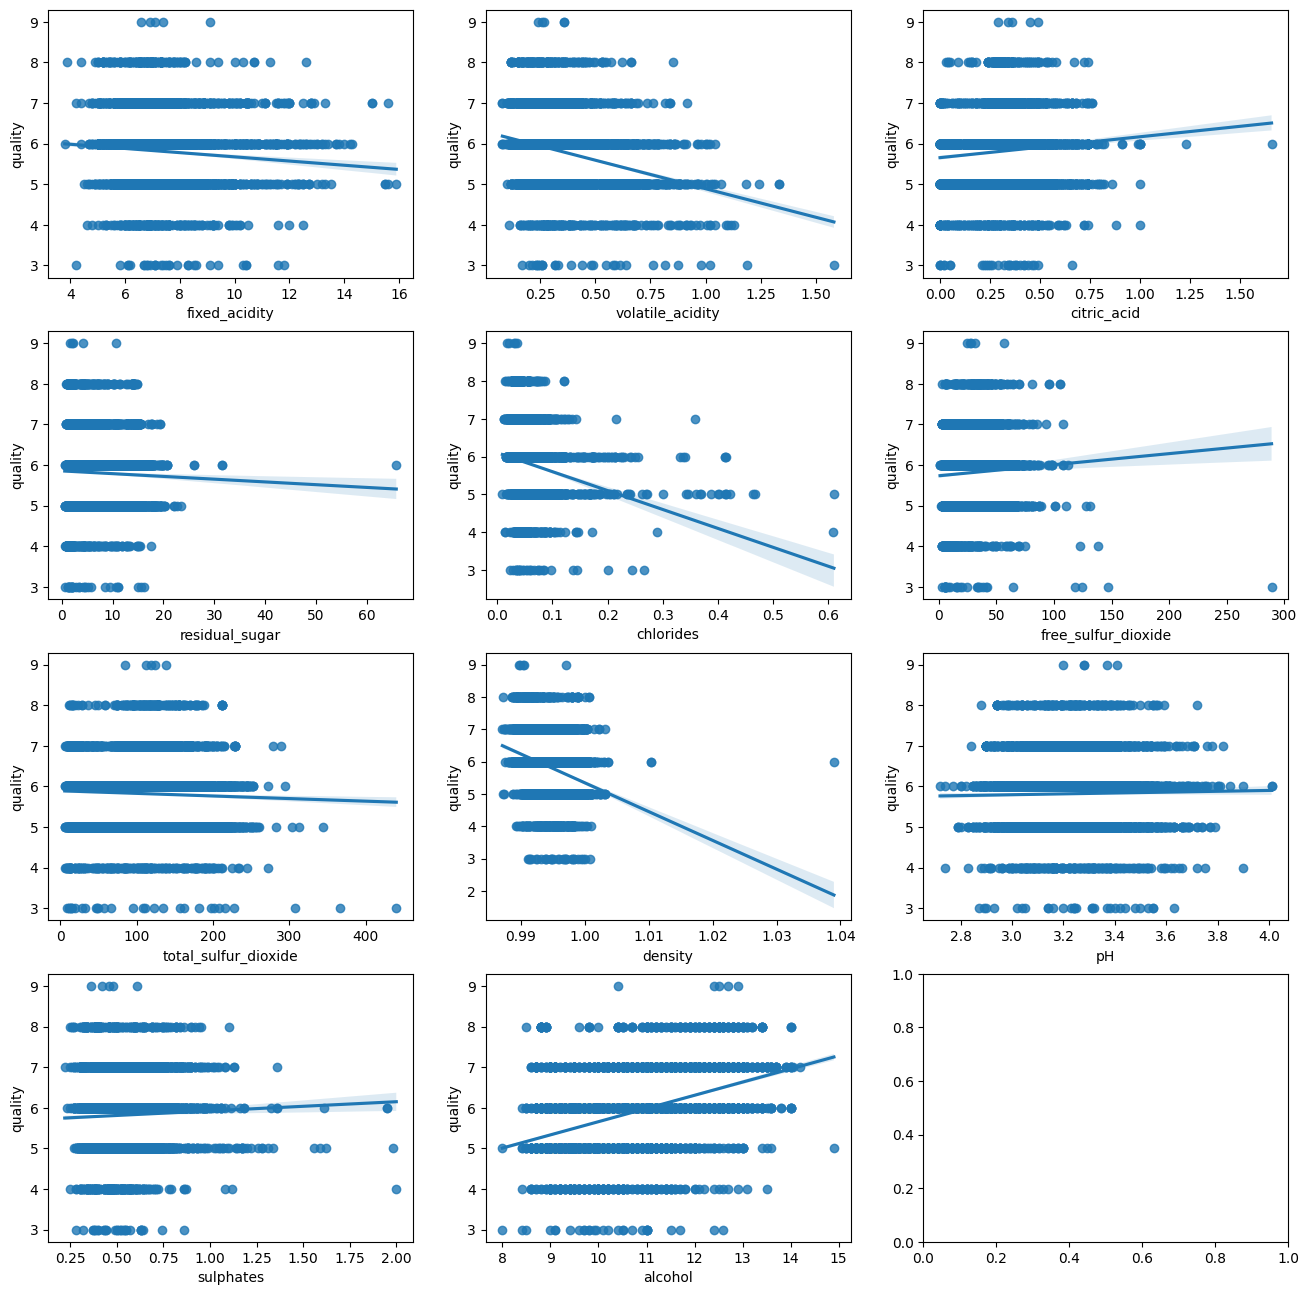

In [21]:
## 산점도
fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=4)

x_features = list(X.columns)

for i, feat in enumerate(x_features):
    row = i // 3
    col = i % 3
    sns.regplot(data=dfWineQuality, x=feat, y='quality',ax=axs[row][col])

plt.show()

In [22]:
## 9등급 와인 추출
dfTemp = dfWineQuality[dfWineQuality['quality'] == 9]

In [23]:
## 9등급 와인 최종 테스트 값
dfWineTop = dfTemp.drop(['quality', 'color'], axis=1)

In [24]:
predicts = model.predict(dfWineTop)

In [25]:
predicts

array([6.02046181, 6.55796422, 6.48233787, 6.62451819, 6.63125784])

#### 결론
- 머신러닝으로 학습을 해도 9등급 와인에 대해서 제대로 예측을 못함